# Challenge #11: Provide insights from Lok Sabha elections data to a media company

AtliQ Media is a private media company and they wanted to telecast a show on Lok Sabha elections 2024 in India. Unlike other channels they do not want to have a debate on who is going to win this election, they rather wanted to present insights from 2014 and 2019 elections without any bias and discuss less explored themes like voter turnout percentage in India.  Peter is a data analyst in the company, and he is handed over this task of generating meaningful insights from data. Since this is a sensitive topic, he seeked help from his manager Tony Sharma who provided the list of primary and secondary questions.

Task: 

Imagine yourself as Peter Pandey and perform the following tasks. 

Begin your analysis by referring to the ‘primary_and_secondary_questions.pdf’. You can use any tool of your choice (Python, SQL, PowerBI, Tableau, Excel, PowerPoint) to analyze and answer these questions. More instructions are provided in this document. 
You can use additional data based on your own research to support your recommendations and provide more insights. 
Be creative with your presentation, audio/video presentation will have more weightage. You will be presenting these insights to the chief editor Bruce Haryali – he appreciates good storytelling and concise presentation. 


### Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


### Loading Data


In [6]:
# Load datasets
results_2014 = pd.read_csv("constituency_wise_results_2014.csv")
results_2019 = pd.read_csv("constituency_wise_results_2019.csv")
state_codes = pd.read_csv("dim_states_codes.csv")


### Data Preprocessing

In [7]:
# Merge state codes to results datasets
results_2014 = pd.merge(results_2014, state_codes, left_on='state', right_on='state_name', how='left')
results_2019 = pd.merge(results_2019, state_codes, left_on='state', right_on='state_name', how='left')


## Primary Questions

### Question 1 - Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2014 and 2019

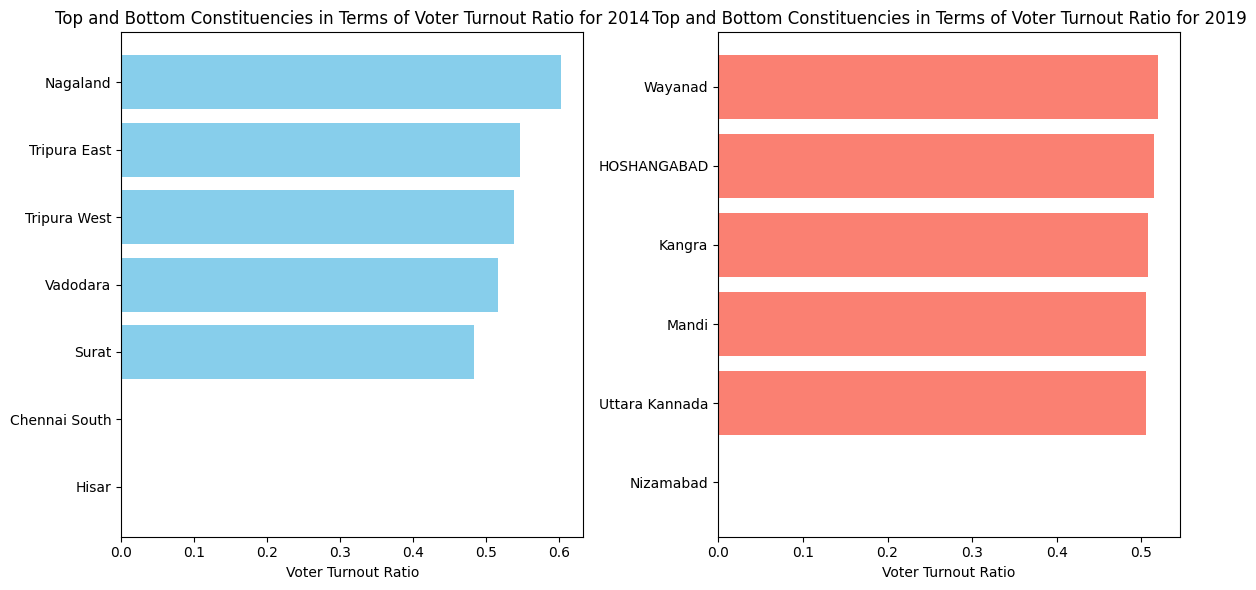

In [8]:
# Calculate voter turnout ratio
results_2014['Turnout_Ratio_2014'] = results_2014['total_votes'] / results_2014['total_electors']
results_2019['Turnout_Ratio_2019'] = results_2019['total_votes'] / results_2019['total_electors']

# Top and bottom constituencies in terms of voter turnout ratio for 2014
top_bottom_turnout_2014 = pd.concat([results_2014.sort_values(by='Turnout_Ratio_2014', ascending=False).head(),
                                     results_2014.sort_values(by='Turnout_Ratio_2014').head()])
top_bottom_turnout_2019 = pd.concat([results_2019.sort_values(by='Turnout_Ratio_2019', ascending=False).head(),
                                     results_2019.sort_values(by='Turnout_Ratio_2019').head()])

# Visualize top and bottom constituencies in terms of voter turnout ratio for 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_bottom_turnout_2014['pc_name'], top_bottom_turnout_2014['Turnout_Ratio_2014'], color='skyblue')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2014')
plt.gca().invert_yaxis()

# Visualize top and bottom constituencies in terms of voter turnout ratio for 2019
plt.subplot(1, 2, 2)
plt.barh(top_bottom_turnout_2019['pc_name'], top_bottom_turnout_2019['Turnout_Ratio_2019'], color='salmon')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom Constituencies in Terms of Voter Turnout Ratio for 2019')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Question 2 - Top and Bottom States in Terms of Voter Turnout Ratio for 2014 and 2019

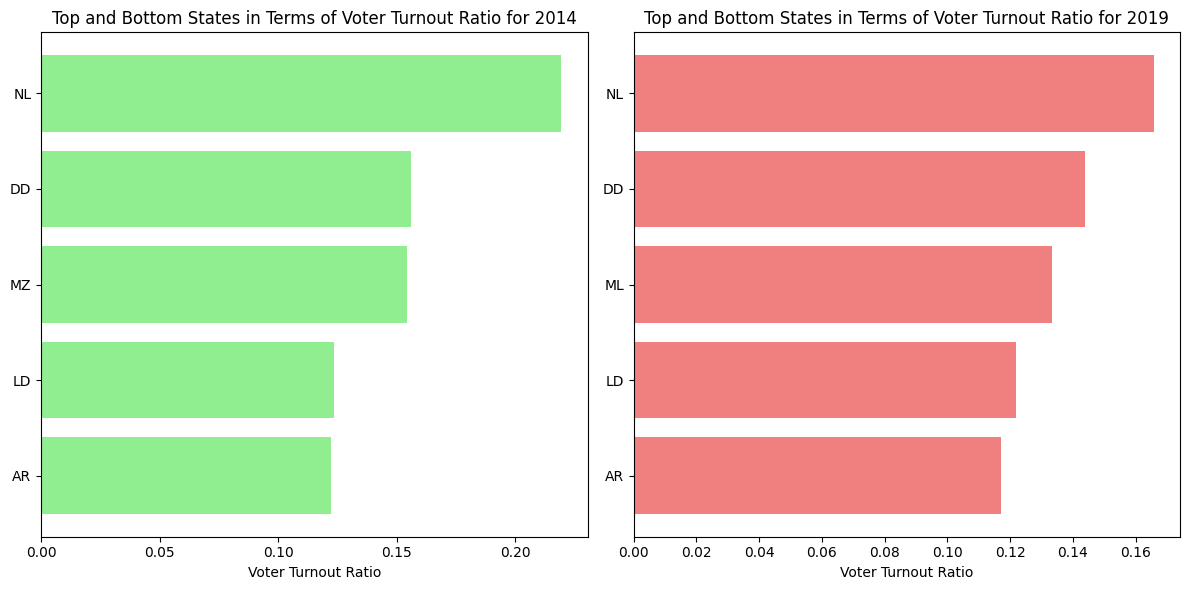

In [9]:
# Voter turnout ratio by state for 2014 and 2019
state_turnout_2014 = results_2014.groupby('abbreviation')['Turnout_Ratio_2014'].mean().sort_values(ascending=False).head()
state_turnout_2019 = results_2019.groupby('abbreviation')['Turnout_Ratio_2019'].mean().sort_values(ascending=False).head()

# Visualize top and bottom states in terms of voter turnout ratio for 2014
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(state_turnout_2014.index, state_turnout_2014.values, color='lightgreen')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom States in Terms of Voter Turnout Ratio for 2014')
plt.gca().invert_yaxis()

# Visualize top and bottom states in terms of voter turnout ratio for 2019
plt.subplot(1, 2, 2)
plt.barh(state_turnout_2019.index, state_turnout_2019.values, color='lightcoral')
plt.xlabel('Voter Turnout Ratio')
plt.title('Top and Bottom States in Terms of Voter Turnout Ratio for 2019')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


### Question 3 - Constituencies Electing the Same Party for Two Consecutive Elections

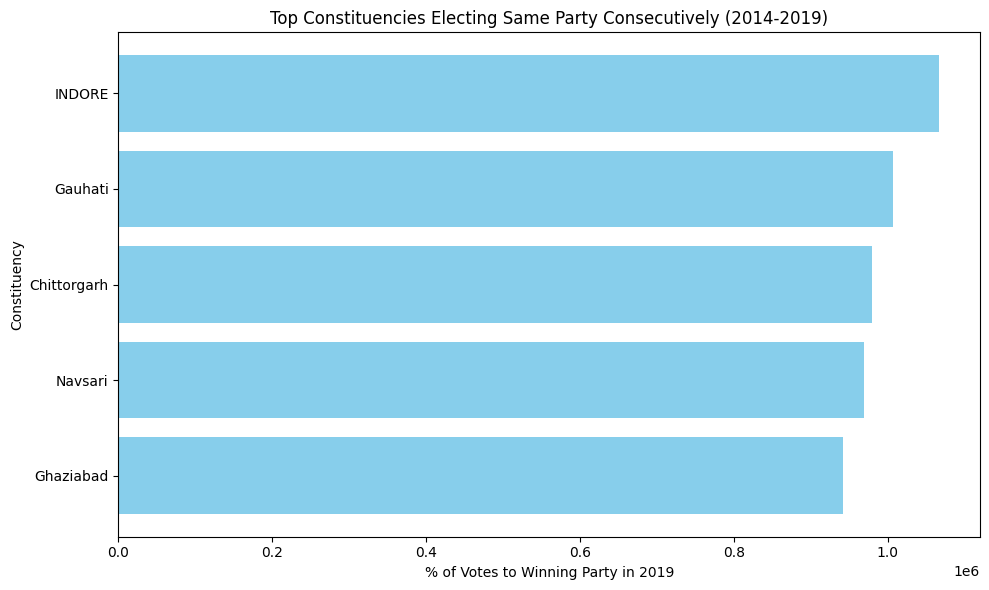

In [26]:
import matplotlib.pyplot as plt

# Assuming consecutive_party_ranked is a DataFrame containing the ranked constituencies
# and their respective percentage of votes to the winning party in 2019

# Extracting data for plotting
constituencies = consecutive_party_ranked['pc_name'].head()
percentage_votes_2019 = consecutive_party_ranked['general_votes_y'].head()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(constituencies, percentage_votes_2019, color='skyblue')
plt.xlabel('% of Votes to Winning Party in 2019')
plt.ylabel('Constituency')
plt.title('Top Constituencies Electing Same Party Consecutively (2014-2019)')
plt.gca().invert_yaxis()  # Invert y-axis to have highest percentage at the top
plt.tight_layout()

# Displaying the plot
plt.show()



### Question 4 - Constituencies Voting for Different Parties in Two Elections

In [15]:
# Constituencies voting for different parties in two elections, top 10 based on difference (2019-2014) in winner vote percentage
different_party = results_2014.merge(results_2019, on=['state', 'pc_name'])
different_party = different_party[(different_party['party_x'] != different_party['party_y'])]
different_party['Vote_Percentage_Difference'] = different_party['general_votes_y'] - different_party['general_votes_x']
top_different_party = different_party.sort_values(by='Vote_Percentage_Difference', ascending=False).head(10)

# Display top constituency voting for different parties in two elections, based on the difference in winner vote percentage
print("Top constituency that has voted for different parties in two elections, based on the difference in winner vote percentage in 2019 compared to 2014:")
print(top_different_party[['state', 'pc_name', 'party_x', 'general_votes_x', 'party_y', 'general_votes_y', 'Vote_Percentage_Difference']].head(1))



Top constituency that has voted for different parties in two elections, based on the difference in winner vote percentage in 2019 compared to 2014:
                state pc_name party_x  general_votes_x party_y  \
51050  Madhya Pradesh  INDORE   SamSP              400     BJP   

       general_votes_y  Vote_Percentage_Difference  
51050          1066824                     1066424  


### Question 5 - Top Candidates Based on Margin Difference with Runners in 2014 and 2019

In [30]:
# Calculate margin difference between the winning candidate and the runner-up candidate in 2014
results_2014['margin_over_runnerup_2014'] = results_2014.groupby('pc_name')['general_votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])

# Calculate margin difference between the winning candidate and the runner-up candidate in 2019
results_2019['margin_over_runnerup_2019'] = results_2019.groupby('pc_name')['general_votes'].transform(lambda x: x.max() - x.nlargest(2).iloc[-1])

# Top candidates based on margin difference with runners in 2014
top_margin_2014 = results_2014.sort_values(by='margin_over_runnerup_2014', ascending=False).head()
top_margin_2014_info = top_margin_2014[['state_name', 'pc_name', 'candidate', 'party', 'margin_over_runnerup_2014']]
print("Top candidates based on margin difference with runners in 2014:")
print(top_margin_2014_info)

# Top candidates based on margin difference with runners in 2019
top_margin_2019 = results_2019.sort_values(by='margin_over_runnerup_2019', ascending=False).head()
top_margin_2019_info = top_margin_2019[['state_name', 'pc_name', 'candidate', 'party', 'margin_over_runnerup_2019']]
print("\nTop candidates based on margin difference with runners in 2019:")
print(top_margin_2019_info)



Top candidates based on margin difference with runners in 2014:
     state_name   pc_name                     candidate  party  \
1781    Gujarat  Vadodara                TAPAN DASGUPTA   SUCI   
1779    Gujarat  Vadodara    ROHIT MADHUSUDAN MOHANBHAI    BSP   
1780    Gujarat  Vadodara        JADAV AMBALAL KANABHAI  JD(U)   
1782    Gujarat  Vadodara  PATHAN MAHEMUDKHAN RAZAKKHAN   ADPT   
1778    Gujarat  Vadodara      MISTRI MADHUSUDAN DEVRAM    INC   

      margin_over_runnerup_2014  
1781                     568003  
1779                     568003  
1780                     568003  
1782                     568003  
1778                     568003  

Top candidates based on margin difference with runners in 2019:
     state_name  pc_name                     candidate party  \
1581    Gujarat  Navsari           SAIYAD MEHMUD AHMAD   IND   
1561    Gujarat  Navsari     AMRUTHAM NARSAIAH PAPAIAH  PPOI   
1583    Gujarat  Navsari                          NOTA  NOTA   
1579    Gujara

### Question 6 - Percentage Split of Votes of Parties Between 2014 vs 2019 at National Level

In [39]:
# Percentage split of votes of parties between 2014 vs 2019 at national level
party_votes_2014 = results_2014.groupby('party')['general_votes'].sum()
party_votes_2019 = results_2019.groupby('party')['general_votes'].sum()
party_votes_split_national = (party_votes_2019 - party_votes_2014) / party_votes_2014 * 100

# Display percentage split of votes of parties between 2014 vs 2019 at national level
print("Percentage split of votes of parties between 2014 and 2019 at national level:")
print(party_votes_split_national)


Percentage split of votes of parties between 2014 and 2019 at national level:
party
A S P           NaN
AAAP     -75.431609
AABHAP          NaN
AACP            NaN
AAHPty          NaN
            ...    
skd             NaN
sps             NaN
ssrd       2.895292
svjn            NaN
swbi            NaN
Name: general_votes, Length: 899, dtype: float64


### Question 7 - Percentage Split of Votes of Parties Between 2014 vs 2019 at State Level

In [21]:
# Percentage split of votes of parties between 2014 vs 2019 at state level
party_votes_2014_state = results_2014.groupby(['abbreviation', 'party'])['general_votes'].sum()
party_votes_2019_state = results_2019.groupby(['abbreviation', 'party'])['general_votes'].sum()
party_votes_split_state = (party_votes_2019_state - party_votes_2014_state) / party_votes_2014_state * 100

# Display percentage split of votes of parties between 2014 vs 2019 at state level
print("Percentage split of votes of parties between 2014 and 2019 at state level:")
print(party_votes_split_state)


Percentage split of votes of parties between 2014 and 2019 at state level:
abbreviation  party  
AN            AAAP      -23.838926
              AIFB             NaN
              AINHCP           NaN
              AITC      -24.791940
              BJP         3.179948
                           ...    
WB            SWJP      -64.525192
              TRMRPPI          NaN
              UTSAP            NaN
              WPOI      -52.014591
              grac        1.420651
Name: general_votes, Length: 1945, dtype: float64


### Question 8 - Top 5 Constituencies for Two Major National Parties Where They Gained Vote Share in 2019

In [41]:
# Find top 5 constituencies for two major national parties where they gained vote share in 2019
major_parties_gain = results_2014.merge(results_2019, on=['state', 'pc_name'])
major_parties_gain = major_parties_gain[(major_parties_gain['party_x'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_gain['party_y'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_gain['general_votes_y'] > major_parties_gain['general_votes_x'])].head()

# Display top 5 constituencies for two major national parties where they gained vote share in 2019
print("Top 5 constituencies for two major national parties where they gained vote share in 2019:")
print(major_parties_gain)


Top 5 constituencies for two major national parties where they gained vote share in 2019:
                  state         pc_name          candidate_x sex_x  age_x  \
11       Andhra Pradesh          Aruku   GUMMIDI SANDHYARANI     F   41.0   
2948     Andhra Pradesh        Bapatla       MALYADRI SRIRAM     M   60.0   
3684     Andhra Pradesh         Kurnool           B.T. NAIDU     M   42.0   
4884     Andhra Pradesh        Rajampet     D.  PURANDESWARI     F   53.0   
5068  Arunachal Pradesh  ARUNACHAL WEST         KIREN RIJIJU     M   42.0   

     category_x party_x party_symbol_x  general_votes_x  postal_votes_x  ...  \
11           ST     TDP        Bicycle           319846            1947  ...   
2948         SC     TDP        Bicycle           574690            3455  ...   
3684        GEN     TDP        Bicycle           427292            1359  ...   
4884        GEN     BJP          Lotus           424885            2105  ...   
5068         ST     BJP          Lotus         

### Question 9 - Top 5 Constituencies for Two Major National Parties Where They Lost Vote Share in 2019

In [23]:
# Find top 5 constituencies for two major national parties where they lost vote share in 2019
major_parties_loss = results_2014.merge(results_2019, on=['state', 'pc_name'])
major_parties_loss = major_parties_loss[(major_parties_loss['party_x'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_loss['party_y'].isin(['TDP', 'BJP'])) & 
                                        (major_parties_loss['general_votes_y'] < major_parties_loss['general_votes_x'])].head()

# Display top 5 constituencies for two major national parties where they lost vote share in 2019
print("Top 5 constituencies for two major national parties where they lost vote share in 2019:")
print(major_parties_loss)


Top 5 constituencies for two major national parties where they lost vote share in 2019:
              state       pc_name                    candidate_x sex_x  age_x  \
12   Andhra Pradesh        Aruku             GUMMIDI SANDHYARANI     F   41.0   
152  Andhra Pradesh    Srikakulam       RAMMOHAN NAIDU KINJARAPU     M   27.0   
155  Andhra Pradesh    Srikakulam       RAMMOHAN NAIDU KINJARAPU     M   27.0   
242  Andhra Pradesh  Vizianagaram  ASHOK GAJAPATHI RAJU PUSAPATI     M   62.0   
245  Andhra Pradesh  Vizianagaram  ASHOK GAJAPATHI RAJU PUSAPATI     M   62.0   

    category_x party_x party_symbol_x  general_votes_x  postal_votes_x  ...  \
12          ST     TDP        Bicycle           319846            1947  ...   
152        GEN     TDP        Bicycle           552348            4197  ...   
155        GEN     TDP        Bicycle           552348            4197  ...   
242        GEN     TDP        Bicycle           534357            2192  ...   
245        GEN     TDP        

### Question 10 - Constituency with the Most Votes for NOTA

In [44]:
# Find the constituency that has voted the most for NOTA
most_nota_constituency = results_2019.sort_values(by='general_votes', ascending=False).head(1)

# Display the constituency that has voted the most for NOTA
print("Constituency that has voted the most for NOTA:")
print(most_nota_constituency)


Constituency that has voted the most for NOTA:
               state pc_name        candidate   sex   age category party  \
3132  Madhya Pradesh  INDORE  SHANKAR LALWANI  MALE  57.0  GENERAL   BJP   

     party_symbol  general_votes  postal_votes  total_votes  total_electors  \
3132        Lotus        1066824          1745      1068569         2350580   

          state_name abbreviation  Turnout_Ratio_2019  \
3132  Madhya Pradesh           MP            0.454598   

      margin_over_runnerup_2019  
3132                     546556  
